# Task 2
Train a multilayer perceptron (fully connected) on the Fashion MNIST dataset using the
traditional train/test split as given by fashion_mnist.load_data in keras. Use a separate 10000
samples (from the training set) for model selection and to compute learning curves (accuracy
vs epochs, not vs n_samples). Compare a “vanilla” model with a model using drop-out
(potentially a bigger model), and to a model using batch normalization and residual
connections (but not dropout). Visualize learning curves for all models.

In [0]:
import keras
from keras.datasets import fashion_mnist
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
import numpy as np
num_classes = len(set(y_train))

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## "Vanilla" Model

The "Vanilla" Model is a sequential model with feed-forward neural networks where one layer follows the other.



In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, input_shape=(784,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy",
              metrics=['accuracy'])

In [0]:
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_split=1/6)


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 54us/step - loss: 0.9875 - acc: 0.6480 - val_loss: 0.5851 - val_acc: 0.7923
Epoch 2/10
50000/50000 [==============================] - 1s 29us/step - loss: 0.5283 - acc: 0.8162 - val_loss: 0.5068 - val_acc: 0.8223
Epoch 3/10
50000/50000 [==============================] - 1s 30us/step - loss: 0.4634 - acc: 0.8397 - val_loss: 0.4672 - val_acc: 0.8363
Epoch 4/10
50000/50000 [==============================] - 1s 29us/step - loss: 0.4286 - acc: 0.8520 - val_loss: 0.4321 - val_acc: 0.8515
Epoch 5/10
50000/50000 [==============================] - 1s 29us/step - loss: 0.4075 - acc: 0.8575 - val_loss: 0.4212 - val_acc: 0.8557
Epoch 6/10
50000/50000 [==============================] - 1s 28us/step - loss: 0.3925 - acc: 0.8644 - val_loss: 0.4088 - val_acc: 0.8585
Epoch 7/10
50000/50000 [==============================] - 1s 29us/step - loss: 0

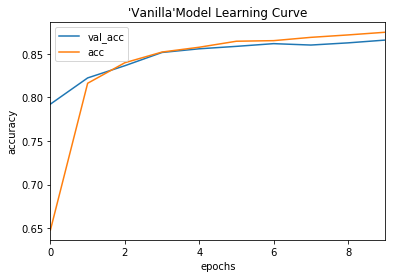

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_callback.history)[['val_acc','acc']].plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.xticks(np.arange(0, 10, step=2))
_ = plt.title("'Vanilla'Model Learning Curve")

Here we have a neural net sequential model with 16 hidden units for the mnist dataset with 10 outputs. The hidden layer nonlinearity is relu, the output if softmax for multi-class classification.


According to the Learning Curve shown above, the "vanilla" model achieves the 86% validation accuracy after 10 epochs trainig. As the number of epochs increases, the training accuracy is keep increasing, while the validation accuracy is increasing at first and be stable at 85% later; the curve goes from underfitting to optimal to a little overfitting.

## Model with Drop-out

The "Drop-out" Model will randomly  ignore neurons during the training randomly. It forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

In [0]:
from keras.layers import Dropout
model_dropout = Sequential([
    Dense(16, input_shape=(784,), activation='relu'),
    Dense(16, activation='relu'),
    Dropout(.5),
    #Dense(256, activation='relu'),
    #Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=10, verbose=1, validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.3826 - acc: 0.4872 - val_loss: 0.7219 - val_acc: 0.7746
Epoch 2/10
50000/50000 [==============================] - 2s 32us/step - loss: 0.9667 - acc: 0.6352 - val_loss: 0.5850 - val_acc: 0.7904
Epoch 3/10
50000/50000 [==============================] - 2s 32us/step - loss: 0.8516 - acc: 0.6799 - val_loss: 0.5300 - val_acc: 0.8155
Epoch 4/10
50000/50000 [==============================] - 2s 31us/step - loss: 0.7938 - acc: 0.7068 - val_loss: 0.5255 - val_acc: 0.8235
Epoch 5/10
50000/50000 [==============================] - 2s 32us/step - loss: 0.7608 - acc: 0.7195 - val_loss: 0.4985 - val_acc: 0.8325
Epoch 6/10
50000/50000 [==============================] - 2s 32us/step - loss: 0.7451 - acc: 0.7259 - val_loss: 0.4819 - val_acc: 0.8319
Epoch 7/10
50000/50000 [==============================] - 2s 32us/step - loss: 0.7303 - acc: 0.7308 - val_loss: 0.4841 - val_acc

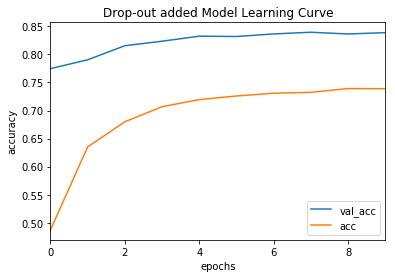

In [0]:
pd.DataFrame(history_dropout.history)[['val_acc','acc']].plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.xticks(np.arange(0, 10, step=2))
_ = plt.title("Drop-out added Model Learning Curve")

On the Drop-out Model above, 50% neurons are randomly ignored during the training phase , which is a regularization method used to reduce overfitting and improve generalization error in the model. It helps by training a large number of neural networks with different architectures in parallel.  


Compared to the "Vanilla" Model performance, the traning accuarcy and validation accuray is not as good as the one without drop-out after 10 epochs trainig. This indicates that the "Drop-out" method effectively reduce the overfitting problem observed in the "Vanilla" Model. Condiering the validation accuacy of the drop-out model, it has lower accuarcy than "Vanilla" model after 10 epochs, which possibly as a result of the small size of neutrons. As this model only has 16 neutrons in the hidden layer, ignoring half of the neutrons leads to the underfitting problem. 

In conclusion, the drop-out method  helps to decrease the generalization error by avoid learning the noise in the training data, contributing to aovid overfitting.

## Model with Batch Normalization and Residual Connections

The "Resnet" Model is performed by add the original input to the output of the convolution block, which is called skip connection. Before each activation stage, we normalize the input layer by adjusting and scaling the activations to reduce the amount by what the hidden unit values shift around (covariance shift).

In [0]:
from keras.layers import Input, Dense, add, Activation
from keras.models import Model
from keras.layers import BatchNormalization

inputs = Input(shape=(784,))

x1 = Dense(16, activation='relu')(inputs)
x2 = Dense(16)(x1)
x3 = BatchNormalization(momentum=0.5)(x2)
x4 = Activation("relu")(x3)
#x2 = BatchNormalization(momentum=0.5)(x1)
#skip1 = add([x1, x2])
#x2 = Dense(32, activation='relu')(x1)
#x4 = Dense(16, activation='relu')(x3)
#x = BatchNormalization()(x)
#x = Dense(8, activation='relu')(x)
skip = add([x1, x4])
#x4 = BatchNormalization(momentum=0.5)(skip)
#skip2 = add([x1, x3, x4])
predictions = Dense(10, activation='softmax')(skip)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_bnre = model.fit(X_train, y_train, batch_size=128,
                            epochs=10, verbose=1, validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 58us/step - loss: 0.8325 - acc: 0.7352 - val_loss: 0.5302 - val_acc: 0.8186
Epoch 2/10
50000/50000 [==============================] - 2s 45us/step - loss: 0.4785 - acc: 0.8350 - val_loss: 0.4477 - val_acc: 0.8419
Epoch 3/10
50000/50000 [==============================] - 2s 45us/step - loss: 0.4236 - acc: 0.8509 - val_loss: 0.4232 - val_acc: 0.8476
Epoch 4/10
50000/50000 [==============================] - 2s 45us/step - loss: 0.3954 - acc: 0.8598 - val_loss: 0.4177 - val_acc: 0.8449
Epoch 5/10
50000/50000 [==============================] - 2s 43us/step - loss: 0.3801 - acc: 0.8637 - val_loss: 0.3923 - val_acc: 0.8576
Epoch 6/10
50000/50000 [==============================] - 2s 39us/step - loss: 0.3645 - acc: 0.8694 - val_loss: 0.4058 - val_acc: 0.8523
Epoch 7/10
50000/50000 [==============================] - 2s 39us/step - loss: 0.3579 - acc: 0.8710 - val_loss: 0.3814 - val_acc

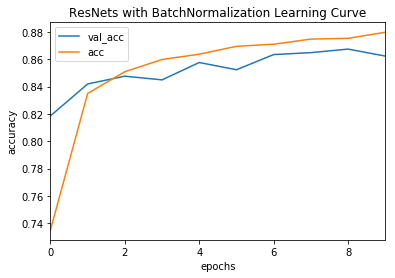

In [0]:
pd.DataFrame(history_bnre.history)[['val_acc','acc']].plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.xticks(np.arange(0, 10, step=2))
_ = plt.title("ResNets with BatchNormalization Learning Curve")

In ResNets, a "skip connection" allows the gradient to be directly backpropagated to earlier layers; They are used to allow gradients to flow through a network directly, without passing through non-linear activation functions. Also, batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.


According to the Learning Curve above, the ResNets model has the similar performance as the "Vanilla" model, but learns faster. This is because skipping effectively simplifies the network, which speeds learning by reducing the impact of vanishing gradients, as there are fewer layers to propagate through. But the layers in the network above is not deep enough to significant the advantage of preventing vanishing gradient problem.